# Reconaissance des régions actives et structures
Reconnaissance automatique des régions actives et structures sur les images des lunettes

Ressources: https://www.computing-conf.org/wp-content/uploads/2022/11/1_AC2022_F_044.pdf

In [83]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

from astropy.io import fits

In [84]:
# 'data/L2/imoa_03933_l2_20240228_12402419_emi1.fts.bz2'
# 'data/L2/imoa_03933_l2_20240228_14452489_emi1.fts.bz2'

filename = 'Y:/data/CLIMSO/2024/data_calibrated/2024-07-14/imoa_03933_l2_20240714_09011769_emi1.fts.bz2'

with fits.open(filename) as hdul:
    hdu = hdul[0].copy()

Detecteur de canny pour obtenir les contours.

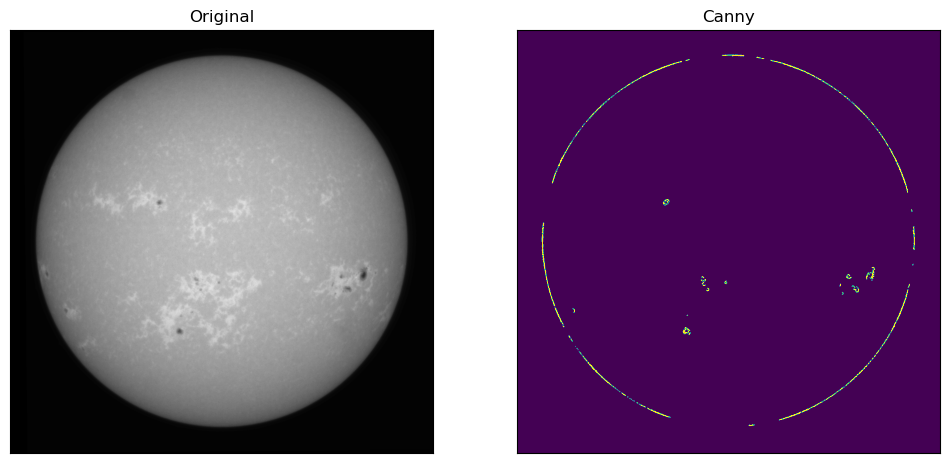

In [85]:
img = cv.convertScaleAbs(hdu.data, alpha=(255.0/65535.0)).astype(np.uint8)

blur = cv.GaussianBlur(img,(9,9),0)

img_canny = cv.Canny(blur, 10, 20) # 8 14

plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img, cmap='grey')
plt.title('Original'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(img_canny, vmin=0, vmax=50)
plt.title('Canny'), plt.xticks([]), plt.yticks([]);

Fermeture pour confondre les elements proches.

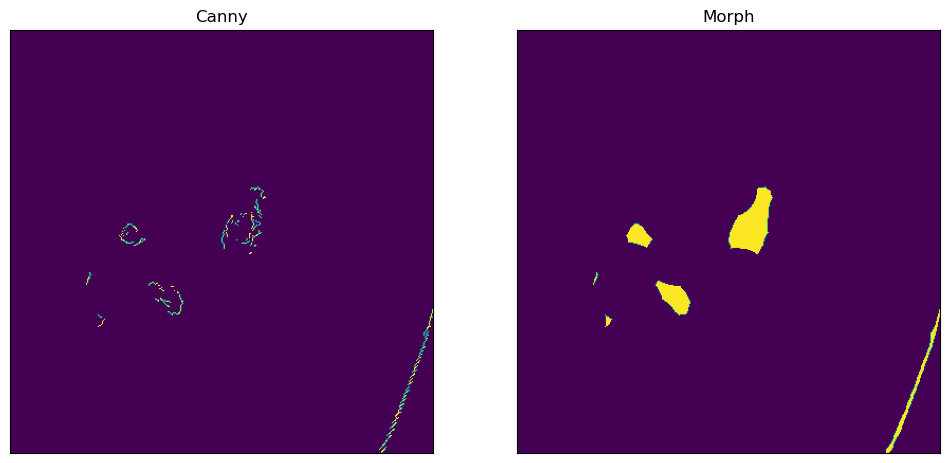

In [86]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(49,49))
img_morph = cv.morphologyEx(img_canny, cv.MORPH_CLOSE, kernel)

x = 1691
y = 2048-848

plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img_canny[y-200:y+200, x-200:x+200])
plt.title('Canny'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(img_morph[y-200:y+200, x-200:x+200])
plt.title('Morph'), plt.xticks([]), plt.yticks([]);

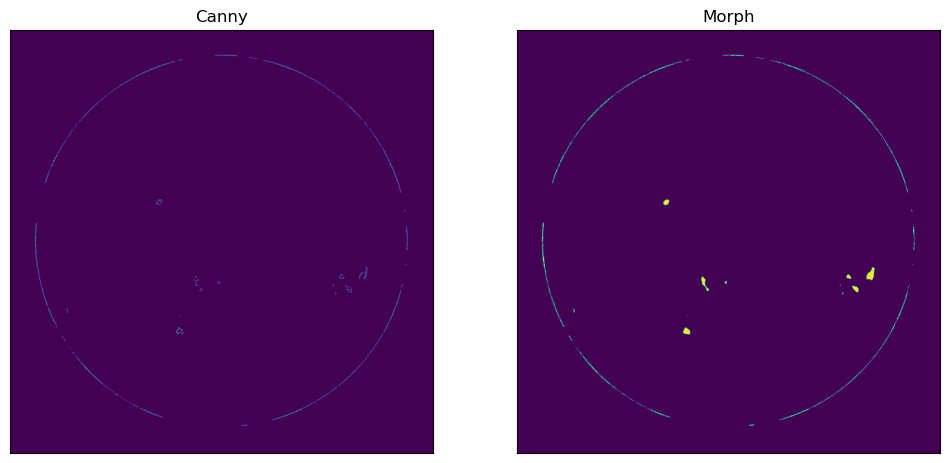

In [87]:
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img_canny)
plt.title('Canny'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(img_morph)
plt.title('Morph'), plt.xticks([]), plt.yticks([]);

On labelise chaque element et on supprime les elements correspondant au contour du disque.

In [88]:
n_labels, labels, stats, centroids = cv.connectedComponentsWithStats(img_morph, connectivity=8)
cv.circle(labels, (1023,1023), 905,color=(0,0,0), thickness = 20);

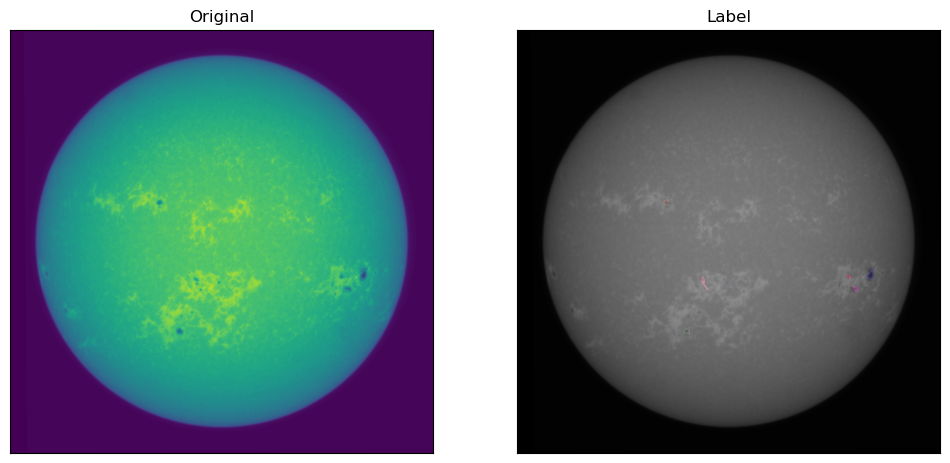

In [129]:
colors = np.random.randint(0, 255, size=(n_labels , 3), dtype=np.uint8)
colors[0] = [0, 0, 0]
false_colors = colors[labels]

img_label = cv.addWeighted(cv.cvtColor(img, cv.COLOR_GRAY2RGB),2,false_colors,0.3,0)

plt.figure(figsize=(12,12))
plt.subplot(121), plt.imshow(img);
plt.title('Original'), plt.xticks([]), plt.yticks([]);
plt.subplot(122), plt.imshow(img_label);
plt.title('Label'), plt.xticks([]), plt.yticks([]);

Rectangle entourant chaque element.

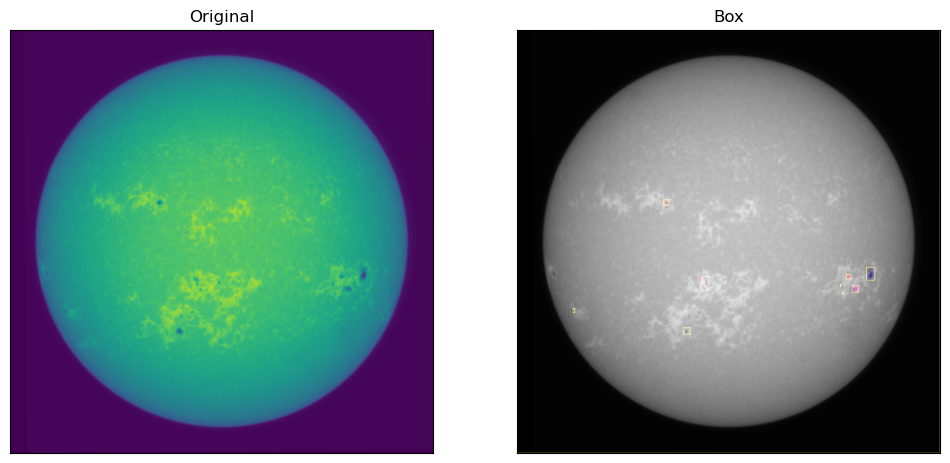

In [130]:
img_boxes = np.zeros(img_label.shape,dtype=np.uint8)
for idx in range(n_labels):
    rect = cv.boundingRect((labels==idx).astype(np.uint8))
    cv.rectangle(img_boxes,rect,(255,255,0),2)

output = cv.addWeighted(img_label,1.6,img_boxes,0.5,0)

plt.figure(figsize=(12,12))
plt.subplot(121), plt.imshow(img);
plt.title('Original'), plt.xticks([]), plt.yticks([]);
plt.subplot(122), plt.imshow(output);
plt.title('Box'), plt.xticks([]), plt.yticks([]);

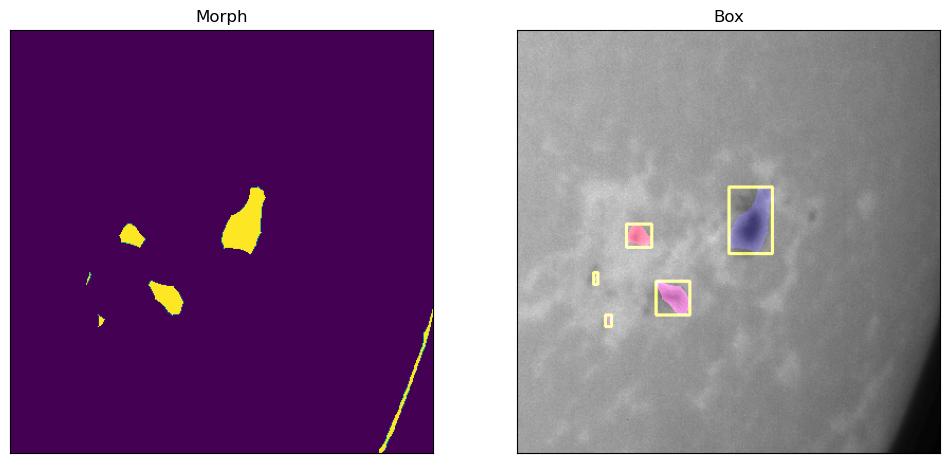

In [131]:
x = 1691
y = 2048-848

plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img_morph[y-200:y+200, x-200:x+200])
plt.title('Morph'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(output[y-200:y+200, x-200:x+200])
plt.title('Box'), plt.xticks([]), plt.yticks([]);

Later:
- Tracking using distance
- Template/Block matching to follow when gap between obs
- SIFT?

- speed (accounting for rotation)